# Cleaning

Es el proceso de “limpiar” los datos llenando datos vacíos, 
corrigiendo datos con ruido, identificando y removiendo 
valores atípicos y resolviendo inconsistencias.
Este proceso es parte de el pre-procesamiento de datos

## Datos confiables

Si los usuarios piensan que los datos están sucios pueden 
no confiar en los resultados del minado
Los datos sucios pueden causar confusión en el proceso de 
minado y generar salidas poco confiables


# Datos faltantes

Algunas causas:

- Los datos nunca fueron ingresados
- Ocurrieron errores técnicos
- Los datos no se consideraron importantes en el momento
- Inconsistencia con otros datos
- El dato no pudo llenarse (no aplica)

# Analizar dataset

In [1]:
import pandas as pd
import requests
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Leer csv
df = pd.read_csv('../data/hotel_bookings.csv')

df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Ver dimensiones

In [2]:
# Ver tamaño del datase
df.shape

(119390, 32)

## Ver tipo de atributos

In [3]:
# Ver tipo de atributos
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

## Ver información general

In [4]:
# Ver información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Ver datos faltantes

In [5]:
faltantes = []
for columna in df.columns:
    atributo = {}
    atributo["columna"] = columna
    # Obtener promedio de valores nulos para la columna
    atributo["porcentaje"] = np.mean(df[columna].isnull())*100
    # Obtener cantidad de valores nulos para la columna
    atributo["cantidad"] = np.sum(df[columna].isnull())
    faltantes.append(atributo)  

# Convertir lista de diccionarios en dataframe
faltantes_df = pd.DataFrame(faltantes)

faltantes_df

,columna,porcentaje,cantidad
0,hotel,0.000000,0
1,is_canceled,0.000000,0
2,lead_time,0.000000,0
3,arrival_date_year,0.000000,0
4,arrival_date_month,0.000000,0
5,arrival_date_week_number,0.000000,0
6,arrival_date_day_of_month,0.000000,0
7,stays_in_weekend_nights,0.000000,0
8,stays_in_week_nights,0.000000,0
9,adults,0.000000,0


## Graficar porcentaje de datos faltantes

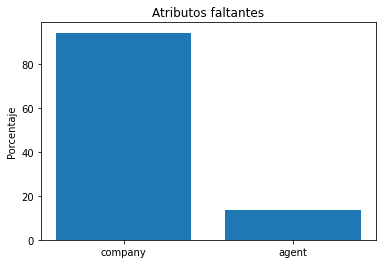

In [6]:
# Ordenar por porcentaje descendente
faltantes_df = faltantes_df.sort_values('porcentaje', ascending=False)

# Filtrar por porcentaje mayor a 0
df_fl_p = faltantes_df.loc[(faltantes_df['porcentaje'] > 10)]

# Graficar
plt.bar(df_fl_p["columna"], df_fl_p["porcentaje"])
plt.ylabel('Porcentaje')
plt.title('Atributos faltantes')
plt.show()    

## Graficar cantidad de datos faltantes

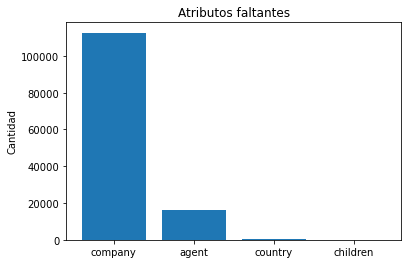

In [7]:
# Ordenar por cantidad descendente
faltantes_df = faltantes_df.sort_values('cantidad', ascending=False)

# Filtrar por cantidad mayor a 0
df_fl_c = faltantes_df.loc[(faltantes_df['cantidad'] > 0)]

# Graficar
plt.bar(df_fl_c["columna"], df_fl_c["cantidad"])
plt.ylabel('Cantidad')
plt.title('Atributos faltantes')
plt.show()     

## Graficar mapa de calor de datos faltantes

<AxesSubplot:>

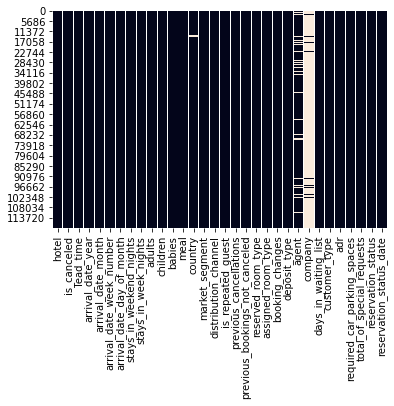

In [8]:
sns.heatmap(df.isnull(), cbar=False)

## Histograma de atributos faltantes

In [9]:
# Copiar dataframe
df_hist = df.copy(deep = False)
# Recorrer columnas
for col in df.columns:
    # Evaluar si los registros faltan
    faltantes = df[col].isnull()
    # Sumar faltantes
    cant_faltantes = np.sum(faltantes)
    # Si existen valores faltantes
    if cant_faltantes > 0:  
        print("Crear indicador para "+str(col))
        # Crear una columna indicadora para esa columna
        df_hist[col+"_faltante"] = faltantes
df_hist

Crear indicador para children
Crear indicador para country
Crear indicador para agent
Crear indicador para company


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,children_faltante,country_faltante,agent_faltante,company_faltante
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,False,False,True,True
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,2015-07-01,False,False,True,True
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,False,False,True,True
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,2015-07-02,False,False,False,True
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,2015-07-03,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,False,False,False,True
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,False,False,False,True
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,False,False,False,True
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,False,False,False,True


In [10]:
# Obtener columnas de indicadores
columnas_faltantes = [col for col in df_hist.columns if '_faltante' in col]
# Sumar columnas faltantes y cargarlo como una columna nueva
df_hist['cant_falt'] = df_hist[columnas_faltantes].sum(axis=1)
display(df_hist)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,children_faltante,country_faltante,agent_faltante,company_faltante,cant_falt
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.00,0,0,Check-Out,2015-07-01,False,False,True,True,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.00,0,0,Check-Out,2015-07-01,False,False,True,True,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.00,0,0,Check-Out,2015-07-02,False,False,True,True,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.00,0,0,Check-Out,2015-07-02,False,False,False,True,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.00,0,1,Check-Out,2015-07-03,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,96.14,0,0,Check-Out,2017-09-06,False,False,False,True,1
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,225.43,0,2,Check-Out,2017-09-07,False,False,False,True,1
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,157.71,0,4,Check-Out,2017-09-07,False,False,False,True,1
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,104.40,0,0,Check-Out,2017-09-07,False,False,False,True,1


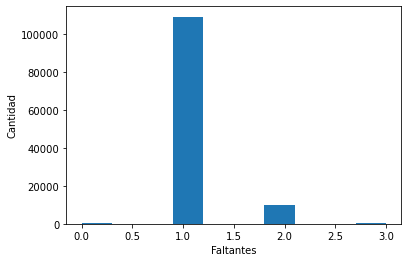

In [11]:
# Graficar histograma
plt.hist(df_hist['cant_falt'])
plt.ylabel('Cantidad')
plt.xlabel('Faltantes');

# Técnicas para tratar valores faltantes

## Eliminar muestras

- Este método generalmente se utiliza cuando el valor faltante 
es el correspondiente a la clase (en casos de clasificación).
- No es muy efectivo a menos que la tupla contiene muchas 
variables faltantes.


In [12]:
df_sin_muestras = df_hist.copy(deep = False)
# Obtener índices de muestras con más de dos atributos faltantes
faltantes_index = df_sin_muestras[df_sin_muestras['cant_falt'] > 2].index
# Eliminar esos índices de el dataframe
df_sin_muestras = df_sin_muestras.drop(faltantes_index, axis=0)
df_sin_muestras

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,children_faltante,country_faltante,agent_faltante,company_faltante,cant_falt
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.00,0,0,Check-Out,2015-07-01,False,False,True,True,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.00,0,0,Check-Out,2015-07-01,False,False,True,True,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.00,0,0,Check-Out,2015-07-02,False,False,True,True,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.00,0,0,Check-Out,2015-07-02,False,False,False,True,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.00,0,1,Check-Out,2015-07-03,False,False,False,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,96.14,0,0,Check-Out,2017-09-06,False,False,False,True,1
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,225.43,0,2,Check-Out,2017-09-07,False,False,False,True,1
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,157.71,0,4,Check-Out,2017-09-07,False,False,False,True,1
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,104.40,0,0,Check-Out,2017-09-07,False,False,False,True,1


## Eliminar atributos

In [13]:
df_sin_atributos = df.copy(deep = False)
display(df_fl_p)
# Filtrar dataframe para aquellos valores donde el porcentaje de falta sea mayor 50
df_fl_p = df_fl_p.loc[(df_fl_p['porcentaje'] > 10)]
print(df_fl_p)
# Eliminar las columnas resultantes del dataframe
df_sin_atributos = df_sin_atributos.drop(df_fl_p["columna"], axis=1)
display(df_sin_atributos)

,columna,porcentaje,cantidad
24,company,94.306893,112593
23,agent,13.686238,16340


    columna  porcentaje  cantidad
24  company   94.306893    112593
23    agent   13.686238     16340


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


## Rellenar valores faltantes

Al ser un método manual toma un tiempo considerable y 
puede no ser aplicable si se trata con un conjunto de datos 
muy grande con una gran cantidad de datos faltantes.

## Reemplazar con mediana

- Solo para valores numéricos

In [14]:
df_mediana = df.copy(deep = False)
print(df_mediana["company"])
# Obtener mediana
mediana = df_mediana['company'].median()
# Llenar valores faltantes con mediana
df_mediana['company'] = df_mediana['company'].fillna(mediana)
print(df_mediana["company"])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
119385   NaN
119386   NaN
119387   NaN
119388   NaN
119389   NaN
Name: company, Length: 119390, dtype: float64
0         179.0
1         179.0
2         179.0
3         179.0
4         179.0
          ...  
119385    179.0
119386    179.0
119387    179.0
119388    179.0
119389    179.0
Name: company, Length: 119390, dtype: float64


## Reemplazar con media

- Solo para valores numéricos

In [15]:
df_media = df.copy(deep = False)
print(df_media["company"])
# Obtener media
media = df_media['company'].mean()
# Llenar valores faltantes con media
df_media['company'] = df_media['company'].fillna(media)
print(df_media["company"])

0         179.0
1         179.0
2         179.0
3         179.0
4         179.0
          ...  
119385    179.0
119386    179.0
119387    179.0
119388    179.0
119389    179.0
Name: company, Length: 119390, dtype: float64
0         179.0
1         179.0
2         179.0
3         179.0
4         179.0
          ...  
119385    179.0
119386    179.0
119387    179.0
119388    179.0
119389    179.0
Name: company, Length: 119390, dtype: float64


## Reemplazar con moda

- Solo para valores categóricos

In [16]:
df_moda = df.copy(deep = False)
# Obtener la moda para columna
moda = df_moda['country'].describe() 
print(moda)
# Reemplazar valores vacíos con moda
df_moda["country"] = df_moda["country"].fillna(moda["top"])
print(df_moda["country"])

count     118902
unique       177
top          PRT
freq       48590
Name: country, dtype: object
0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object


## Estimar el valor

Obtener el valor más probable puede lograrse mediante algunas de las siguientes técnicas:

- Regresión
- Inferencia Bayesiana
- Árboles de decisión de inferencia

Cada valor es calculado tomando en cuenta la información  
existente en el conjunto de datos. 
Preserva mejor la relación entre los 
atributos.

## Usar constante global

Consiste en remplazar todos los valores faltantes con la 
misma constantes con una etiqueta como “Unknown” o 
“NULL”.
Es importante tener esta decisión en cuenta para que el 
programa elegido no tome dicha etiqueta como un valor 
durante el análisis 

In [17]:
df_global = df.copy(deep = False)
# Reemplazar valores faltantes con un string
df_global['country'] = df_global['country'].fillna('_faltante_')


# Reemplazar valores faltantes con un número fuera del rango
df_global['company'] = df_global['company'].fillna(-999)